#**Import Library**

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import math

from IPython.display import Image
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from datetime import timedelta, datetime

%matplotlib inline

In [2]:
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv"
# Load each dataset
df1 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv")

# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Display the merged DataFrame
merged_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1987-12-18T20:54:33.750Z,28.239,56.683,33.0,4.6,mb,NaN,NaN,NaN,0.9,...,2014-11-07T00:41:24.357Z,"115 km S of K?h Sef?d, Iran",earthquake,NaN,NaN,NaN,24.0,reviewed,us,us
1,1987-12-18T16:24:03.050Z,28.191,56.677,19.8,5.9,mw,NaN,NaN,NaN,1.0,...,2022-04-27T21:27:51.633Z,"117 km NNE of Bandar Abbas, Iran",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
2,1987-11-30T03:12:37.000Z,30.990,51.170,37.7,4.8,mb,NaN,NaN,NaN,1.1,...,2014-11-07T00:41:16.294Z,"53 km NW of Yasuj, Iran",earthquake,NaN,8.0,NaN,32.0,reviewed,us,us
3,1987-11-27T08:26:43.780Z,32.691,59.100,33.0,4.7,mb,NaN,NaN,NaN,0.7,...,2020-08-28T21:42:24.936Z,Eastern Iran,earthquake,NaN,NaN,NaN,26.0,reviewed,us,us
4,1987-11-25T22:53:29.970Z,28.231,56.753,33.0,4.5,mb,NaN,NaN,NaN,1.0,...,2014-11-07T00:41:15.759Z,"115 km S of K?h Sef?d, Iran",earthquake,NaN,NaN,NaN,11.0,reviewed,us,us


In [3]:
df = merged_df

In [4]:
# daftar jenis magnitude
df['magType'].value_counts()

mb       3333
mwc       190
mw        127
mww       111
ms         66
mwb        38
mwr         6
mblg        5
ml          2
mb_lg       1
Name: magType, dtype: int64

In [5]:
# Mengambil hanya kolom yang diinginkan
selected_columns = ['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource', 'magSource']
df_selected_columns = df[selected_columns]

# Menampilkan DataFrame yang hanya berisi kolom yang dipilih
df_selected_columns.head(10)
df = df_selected_columns
df.head(6)

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,1987-12-18T20:54:33.750Z,28.239,56.683,33.0,4.6,mb,us,usp0003bda,2014-11-07T00:41:24.357Z,earthquake,reviewed,us,us
1,1987-12-18T16:24:03.050Z,28.191,56.677,19.8,5.9,mw,us,usp0003bd4,2022-04-27T21:27:51.633Z,earthquake,reviewed,us,hrv
2,1987-11-30T03:12:37.000Z,30.990,51.170,37.7,4.8,mb,us,usp0003apk,2014-11-07T00:41:16.294Z,earthquake,reviewed,us,us
3,1987-11-27T08:26:43.780Z,32.691,59.100,33.0,4.7,mb,us,usp0003am3,2020-08-28T21:42:24.936Z,earthquake,reviewed,us,us
4,1987-11-25T22:53:29.970Z,28.231,56.753,33.0,4.5,mb,us,usp0003ajj,2014-11-07T00:41:15.759Z,earthquake,reviewed,us,us
5,1987-11-24T13:15:29.310Z,32.402,58.890,33.0,4.6,mb,us,usp0003afd,2014-11-07T00:41:15.063Z,earthquake,reviewed,us,us


**Gutenberg–Richter law**

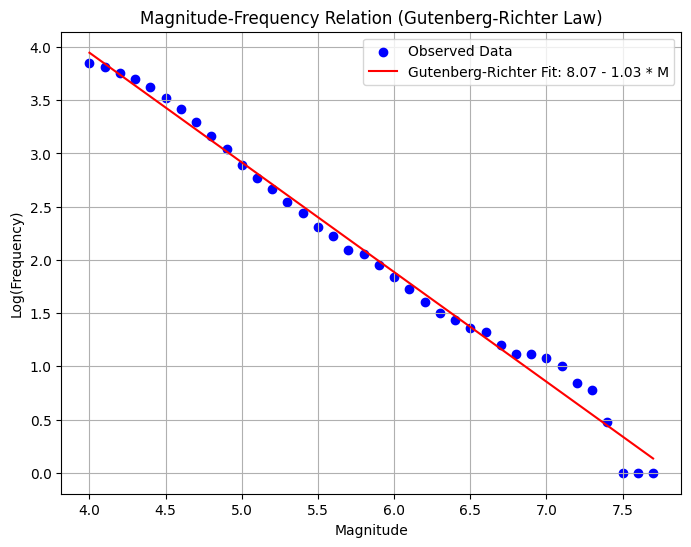

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = df

# Hapus nilai NaN atau infinitas dari kolom 'mag'
data = data.dropna(subset=['mag'])

# Hitung frekuensi kejadian gempa per rentang magnitudo
magnitudes = np.arange(4.0, 8.6, 0.1)  # Rentang magnitudo
frequency = []

for mag in magnitudes:
    count = len(data[data['mag'] >= mag])
    frequency.append(count)

# Hapus nol dari frekuensi untuk menghindari log(0)
frequency = np.array(frequency)
frequency = frequency[frequency != 0]

# Fungsi untuk regresi linear pada skala log-log (Gutenberg-Richter)
def gutenberg_richter(m, a, b):
    return a - b * m

# Perkirakan parameter a dan b untuk garis regresi
popt, pcov = curve_fit(gutenberg_richter, magnitudes[:len(frequency)], np.log10(frequency))

# Plot MFR (Magnitude-Frequency Relation) pada skala log-log dengan garis regresi
plt.figure(figsize=(8, 6))
plt.scatter(magnitudes[:len(frequency)], np.log10(frequency), color='blue', label='Observed Data')
plt.plot(magnitudes[:len(frequency)], gutenberg_richter(magnitudes[:len(frequency)], *popt), color='red', label=f'Gutenberg-Richter Fit: {popt[0]:.2f} - {popt[1]:.2f} * M')
plt.xlabel('Magnitude')
plt.ylabel('Log(Frequency)')
plt.title('Magnitude-Frequency Relation (Gutenberg-Richter Law)')
plt.legend()
plt.grid(True)
plt.show()


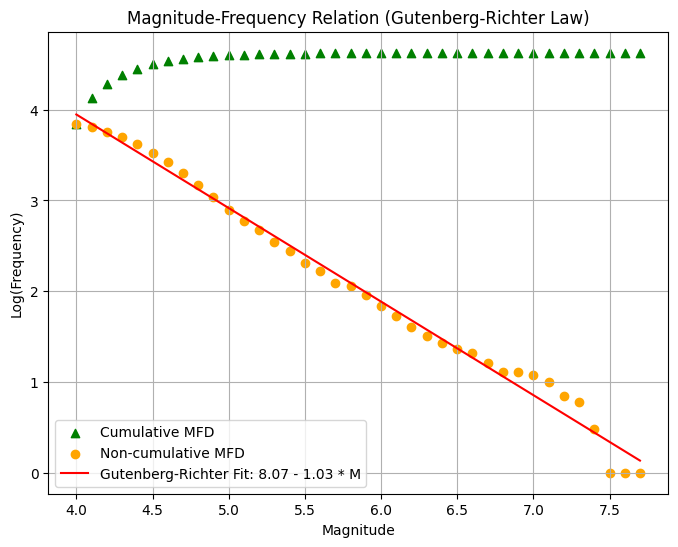

In [12]:
# Simpan nilai MFD kumulatif dan non-kumulatif
magnitudes = np.arange(4.0, 8.6, 0.1)  # Rentang magnitudo
cumulative_values = np.cumsum(frequency)
non_cumulative_values = frequency

# Plot MFR (Magnitude-Frequency Relation) pada skala log-log dengan garis regresi
plt.figure(figsize=(8, 6))

# Scatter plot untuk MFD kumulatif (gunakan segitiga)
plt.scatter(magnitudes[:len(cumulative_values)], np.log10(cumulative_values), color='green', marker='^', label='Cumulative MFD')

# Scatter plot untuk MFD non-kumulatif (gunakan lingkaran)
plt.scatter(magnitudes[:len(non_cumulative_values)], np.log10(non_cumulative_values), color='orange', marker='o', label='Non-cumulative MFD')

# Plot garis regresi
plt.plot(magnitudes[:len(frequency)], gutenberg_richter(magnitudes[:len(frequency)], *popt), color='red', label=f'Gutenberg-Richter Fit: {popt[0]:.2f} - {popt[1]:.2f} * M')

plt.xlabel('Magnitude')
plt.ylabel('Log(Frequency)')
plt.title('Magnitude-Frequency Relation (Gutenberg-Richter Law)')
plt.legend()
plt.grid(True)
plt.show()
